<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JingQian_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

Check for missing/null values in the three dataframes

In [99]:
cell_phones.head(4)

,geo,time,cell_phones_total
0,abw,1960,0.0000
1,abw,1965,0.0000
2,abw,1970,0.0000
3,abw,1975,0.0000


In [3]:
pd.isnull(cell_phones).sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [4]:
pd.isnull(population).sum()

geo                 0
time                0
population_total    0
dtype: int64

In [5]:
pd.isnull(geo_country_codes).sum()

geo        0
country    0
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phone_total"

In [6]:
cell_phones.dtypes

geo                   object
time                   int64
cell_phones_total    float64
dtype: object

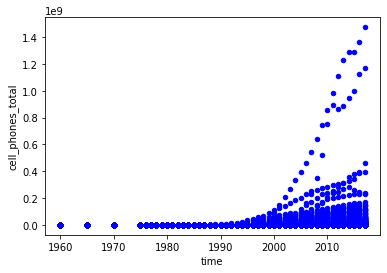

In [7]:
import seaborn as sns
# sns.scatterplot(x = cell_phones['time'], y=cell_phones['cell_phones_total'])
ax = cell_phones.plot.scatter(x='time', y='cell_phones_total',c='blue')

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

Why use a inner join? 
Answer: because we are investigting the relationship between number of cell phone and population, we need both data for the time frame we are checking

In [102]:
population.head(100)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000
...,...,...,...
95,afg,1895,4863258
96,afg,1896,4894458
97,afg,1897,4925855
98,afg,1898,4957450


In [9]:
population_phone = cell_phones.merge(population, how='inner', on = ['geo', 'time'])
print(population_phone.shape)

(8590, 4)


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [100]:
geo_country_codes.head(4)

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola


In [11]:
geo_population_phone = population_phone.merge(geo_country_codes, how='left', on='geo')
print(geo_population_phone.shape)

(8590, 5)


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [12]:
geo_population_phone['phone_per_person'] = geo_population_phone['cell_phones_total']/geo_population_phone['population_total']
geo_population_phone[(geo_population_phone['country']=='United States') & (geo_population_phone['time']==2017)]

,geo,time,cell_phones_total,population_total,country,phone_per_person
8134,usa,2017,395881000.0,324459463,United States,1.220125


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [13]:
geo_population_phone.describe()

,time,cell_phones_total,population_total,phone_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [14]:
countries=geo_population_phone['country'].unique()
print(countries)
len(countries)

['Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Chile' 'China'
 "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia'
 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czech Republic'
 'Germany' 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'Ecuador' 'Egypt' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'France' 'Micronesia, Fed. Sts.' 'Gabon' 'United Kingdom' 'Georgia'
 'Ghana' 'Guinea' 'Gambia' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Guatemala' 'Guyana' 'Hong Kong, China' 'Honduras' 'Croatia'
 'Haiti' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iran' 'Iraq' 'Iceland'
 'Israel' 'Italy

195

In [15]:
geo_codes=geo_population_phone['geo'].unique()
print(geo_codes)
len(geo_codes)

['afg' 'ago' 'alb' 'and' 'are' 'arg' 'arm' 'atg' 'aus' 'aut' 'aze' 'bdi'
 'bel' 'ben' 'bfa' 'bgd' 'bgr' 'bhr' 'bhs' 'bih' 'blr' 'blz' 'bol' 'bra'
 'brb' 'brn' 'btn' 'bwa' 'caf' 'can' 'che' 'chl' 'chn' 'civ' 'cmr' 'cod'
 'cog' 'col' 'com' 'cpv' 'cri' 'cub' 'cyp' 'cze' 'deu' 'dji' 'dma' 'dnk'
 'dom' 'dza' 'ecu' 'egy' 'eri' 'esp' 'est' 'eth' 'fin' 'fji' 'fra' 'fsm'
 'gab' 'gbr' 'geo' 'gha' 'gin' 'gmb' 'gnb' 'gnq' 'grc' 'grd' 'gtm' 'guy'
 'hkg' 'hnd' 'hrv' 'hti' 'hun' 'idn' 'ind' 'irl' 'irn' 'irq' 'isl' 'isr'
 'ita' 'jam' 'jor' 'jpn' 'kaz' 'ken' 'kgz' 'khm' 'kir' 'kna' 'kor' 'kwt'
 'lao' 'lbn' 'lbr' 'lby' 'lca' 'lie' 'lka' 'lso' 'ltu' 'lux' 'lva' 'mar'
 'mco' 'mda' 'mdg' 'mdv' 'mex' 'mhl' 'mkd' 'mli' 'mlt' 'mmr' 'mne' 'mng'
 'moz' 'mrt' 'mus' 'mwi' 'mys' 'nam' 'ner' 'nga' 'nic' 'nld' 'nor' 'npl'
 'nru' 'nzl' 'omn' 'pak' 'pan' 'per' 'phl' 'plw' 'png' 'pol' 'prk' 'prt'
 'pry' 'pse' 'qat' 'rou' 'rus' 'rwa' 'sau' 'sdn' 'sen' 'sgp' 'slb' 'sle'
 'slv' 'smr' 'som' 'srb' 'ssd' 'stp' 'sur' 'svk' 's

195

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [16]:
sorted_2017 = geo_population_phone[geo_population_phone['time']==2017].sort_values(by='cell_phones_total', ascending=False)
sorted_2017

,geo,time,cell_phones_total,population_total,country,phone_per_person
1496,chn,2017,1.474097e+09,1409517397,China,1.045817
3595,ind,2017,1.168902e+09,1339180127,India,0.872849
3549,idn,2017,4.589232e+08,263991379,Indonesia,1.738402
8134,usa,2017,3.958810e+08,324459463,United States,1.220125
1084,bra,2017,2.364885e+08,209288278,Brazil,1.129966
...,...,...,...,...,...,...
4596,lie,2017,4.662500e+04,37922,Liechtenstein,1.229497
4220,kir,2017,4.612300e+04,116398,Kiribati,0.396253
7005,smr,2017,3.800000e+04,33400,San Marino,1.137725
4918,mco,2017,3.297800e+04,38695,Monaco,0.852255


In [17]:
top5=sorted_2017.iloc[0:5, [4,2]]
print(top5.to_string(index=False))

       country  cell_phones_total
         China       1.474097e+09
         India       1.168902e+09
     Indonesia       4.589232e+08
 United States       3.958810e+08
        Brazil       2.364885e+08


In [18]:
pd.options.display.float_format = '{:20,.0f}'.format
print(top5.to_string(index=False))

       country    cell_phones_total
         China        1,474,097,000
         India        1,168,902,277
     Indonesia          458,923,202
 United States          395,881,000
        Brazil          236,488,548


Filter the cell_phones dataframe to only include information about the USA and China and then remake the scatterplot.

In [78]:
USA_China = geo_population_phone[(geo_population_phone['country']== 'United States')| (geo_population_phone['country']=='China')]
USA_China.head(100)

,geo,time,cell_phones_total,population_total,country,phone_per_person
1451,chn,1960,0.0000,657686143,China,0.0000
1452,chn,1965,0.0000,722562183,China,0.0000
1453,chn,1970,0.0000,824788457,China,0.0000
1454,chn,1975,0.0000,920945083,China,0.0000
1455,chn,1976,0.0000,937018252,China,0.0000
...,...,...,...,...,...,...
8130,usa,2013,"310,698,000.0000",315536676,United States,0.9847
8131,usa,2014,"355,500,000.0000",317718779,United States,1.1189
8132,usa,2015,"382,307,000.0000",319929162,United States,1.1950
8133,usa,2016,"395,881,000.0000",322179605,United States,1.2288


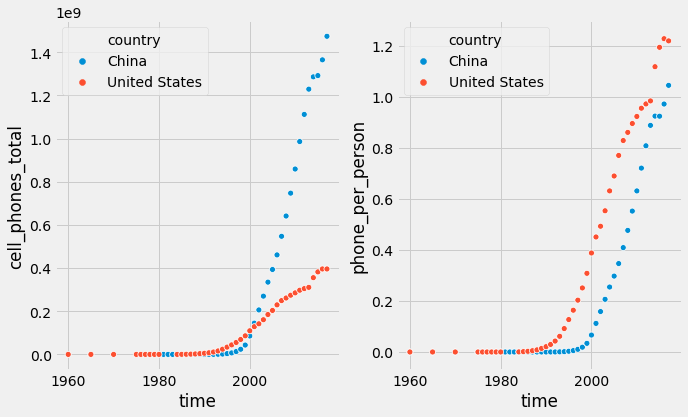

In [98]:
fig, axs=plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6), sharey=False)
sns.scatterplot(x='time', y='cell_phones_total', hue='country', data=USA_China, ax=axs[0]);
sns.scatterplot(x='time', y='phone_per_person', hue='country', data=USA_China, ax=axs[1]);


Now make geo upper case

In [103]:
geo_population_phone['geo']=geo_population_phone['geo'].str.upper()
geo_population_phone.head(4)

,geo,time,cell_phones_total,population_total,country,phone_per_person
0,AFG,1960,0.0000,8996351,Afghanistan,0.0000
1,AFG,1965,0.0000,9938414,Afghanistan,0.0000
2,AFG,1970,0.0000,11126123,Afghanistan,0.0000
3,AFG,1975,0.0000,12590286,Afghanistan,0.0000


When USA has more cellphone than people?

In [117]:
USA_China[(USA_China['phone_per_person']>1) & (USA_China['geo']=='usa')].sort_values(by='time', ascending=True)

,geo,time,cell_phones_total,population_total,country,phone_per_person
8131,usa,2014,"355,500,000.0000",317718779,United States,1.1189
8132,usa,2015,"382,307,000.0000",319929162,United States,1.1950
8133,usa,2016,"395,881,000.0000",322179605,United States,1.2288
8134,usa,2017,"395,881,000.0000",324459463,United States,1.2201


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [20]:
df.head(10)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"
5,1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,"Acting, Comedy & Music"
7,1999,model,1/21/99,Media,Carmen Electra,Media
8,1999,actor,1/25/99,Acting,Matthew Lillard,"Acting, Comedy & Music"
9,1999,stand-up comedian,1/26/99,Comedy,David Cross,"Acting, Comedy & Music"


In [33]:
table = pd.crosstab(df['Year'], df['Occupation'], normalize='index')
pd.options.display.float_format = '{:20,.4f}'.format
table

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036,0.0120,0.0663,0.0181
2000,0.7396,0.0828,0.1243,0.0533
2001,0.7261,0.0382,0.1975,0.0382
2002,0.6226,0.0692,0.2642,0.0440
2003,0.5602,0.1024,0.2470,0.0904
2004,0.3841,0.2256,0.2744,0.1159
2005,0.3704,0.1605,0.3333,0.1358
2006,0.3602,0.1925,0.2919,0.1553
2007,0.2553,0.1702,0.3333,0.2411


### Part 2 — Recreate this explanatory visualization:



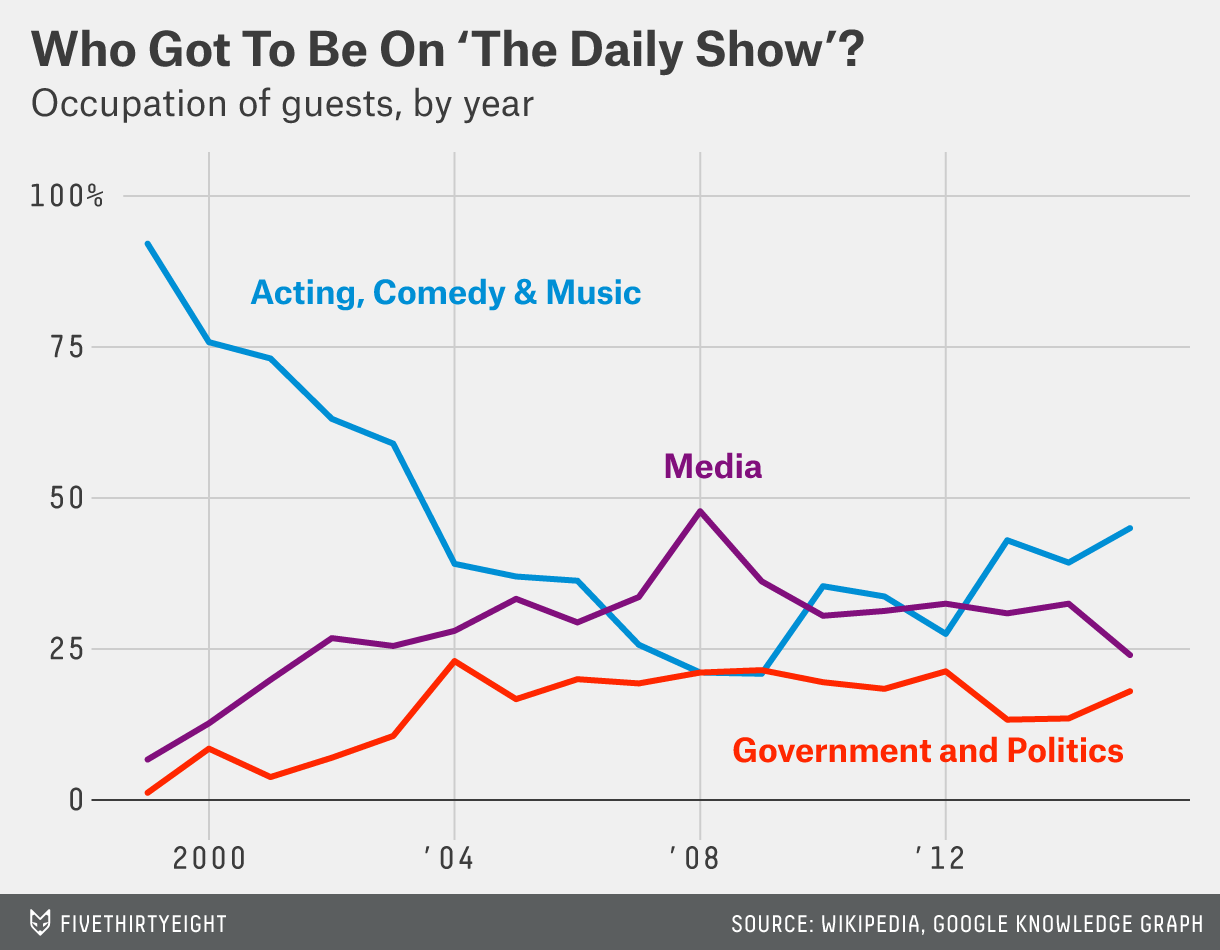

In [34]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

In [0]:
table.reset_index(inplace=True)

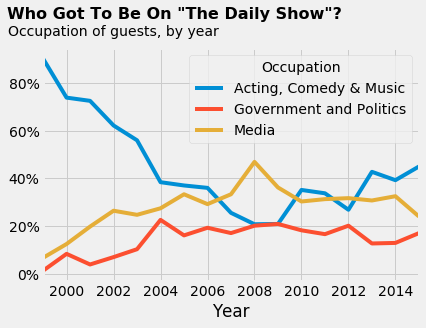

In [71]:
plt.style.use('fivethirtyeight')

occupation_to_plot =list(table.columns.to_list()[1:4])

ax = table.plot.line(x='Year', y=occupation_to_plot) 
ax.set_title('Who Got To Be On "The Daily Show"?', fontsize=16, fontweight='bold', x=.35, y=1.1)
# Set subtitle
ax.text(s='Occupation of guests, by year', y=1, x=1997.5, fontsize=14)
# manipulate y axis
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals]);


## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.
